In [1]:
import numpy as np
from foe_foundry_nl.embeddings import embedding_distance, embedding_similarity, load_oai_embeddings, get_all_embeddings
from foe_foundry_nl.data.monsters import get_canonical_monsters, name_to_key
from foe_foundry_nl.queries import find_similar_monsters_from_description, find_closest_monsters
from foe_foundry.creature_types import CreatureType
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


sns.set_style("whitegrid")
sns.set_palette("hls", len(CreatureType.all()))

In [2]:
monsters = get_canonical_monsters()
oai_embeddings = load_oai_embeddings(list(monsters.keys()), skip_if_missing=True)
embeddings = get_all_embeddings()

c:\code\foe_foundry\.venv\lib\site-packages\transformers\models\bert\modeling_bert.py:440: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(


Text(0.5, 1.0, 'OAI Embeddings of All Monsters')

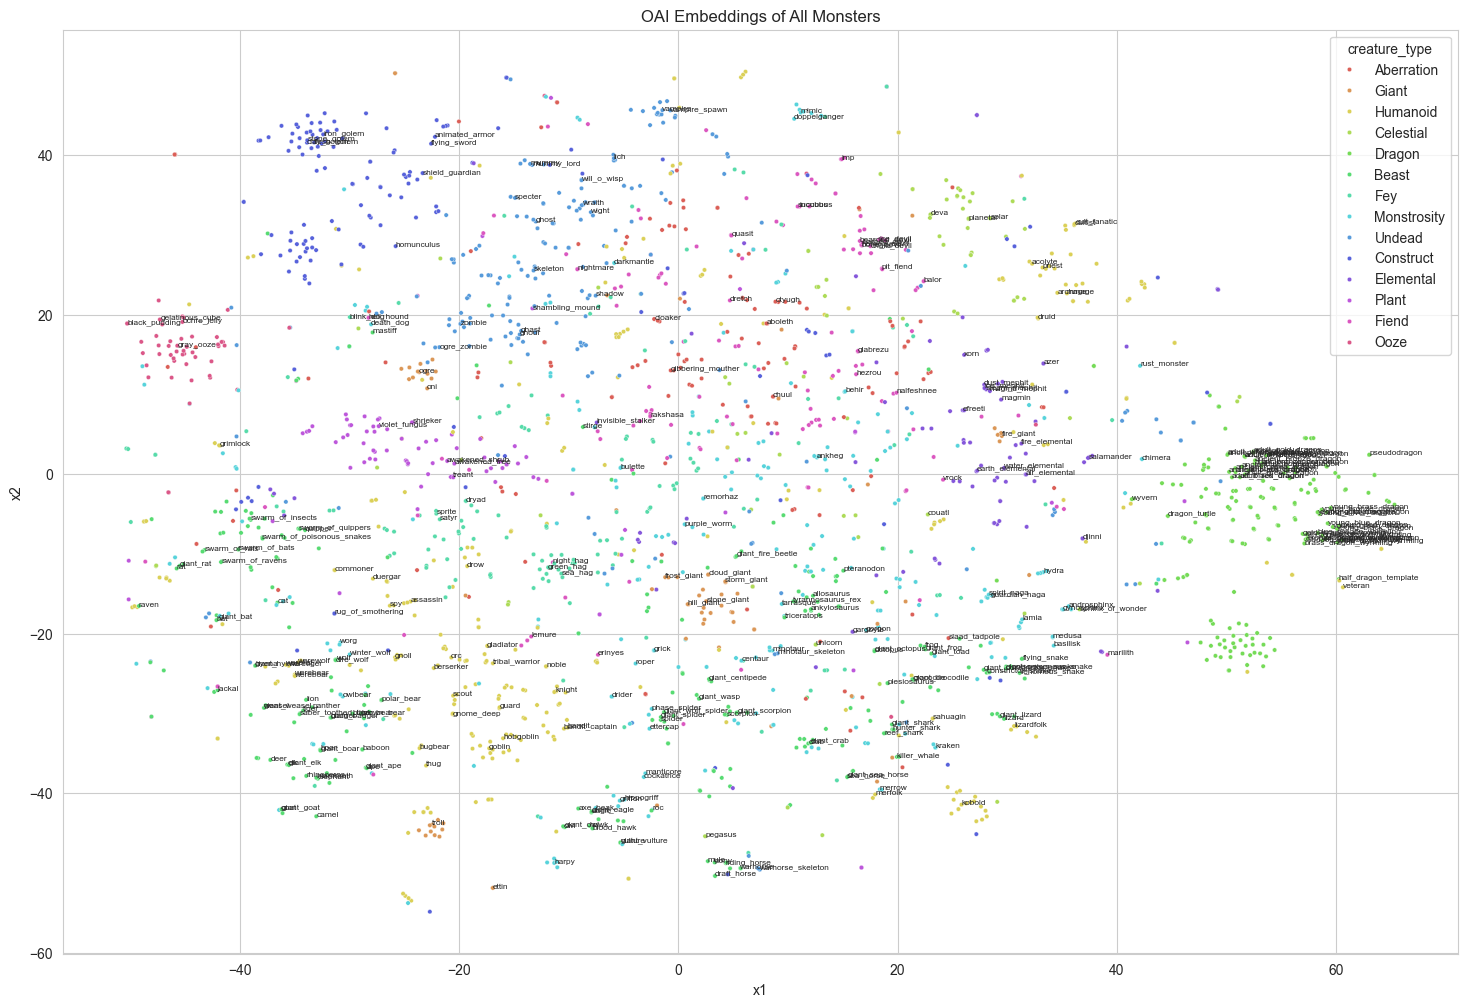

In [3]:
tsne = TSNE(n_components=2, random_state=20240711)
X = tsne.fit_transform(oai_embeddings.embeddings)

x1, x2 = X[:, 0], X[:, 1]
ct = [monsters[k].creature_type for k in oai_embeddings.keys]

df = pd.DataFrame([
    pd.Series(x1, name='x1'),
    pd.Series(x2, name='x2'),
    pd.Series(ct, name='creature_type')
]).T

fig, ax = plt.subplots(1,1, figsize=(18,12))
sns.scatterplot(
    data=df,
    x='x1',
    y='x2',
    hue='creature_type',
    ax=ax,
    s=10
)

for i, key in enumerate(oai_embeddings.keys):
    monster = monsters[key]
    if monster.is_srd:
        ax.annotate(monster.key, (x1[i], x2[i]), size=6)

ax.set_title("OAI Embeddings of All Monsters")

Text(0.5, 1.0, 'OAI Embeddings of SRD Monsters (PCA)')

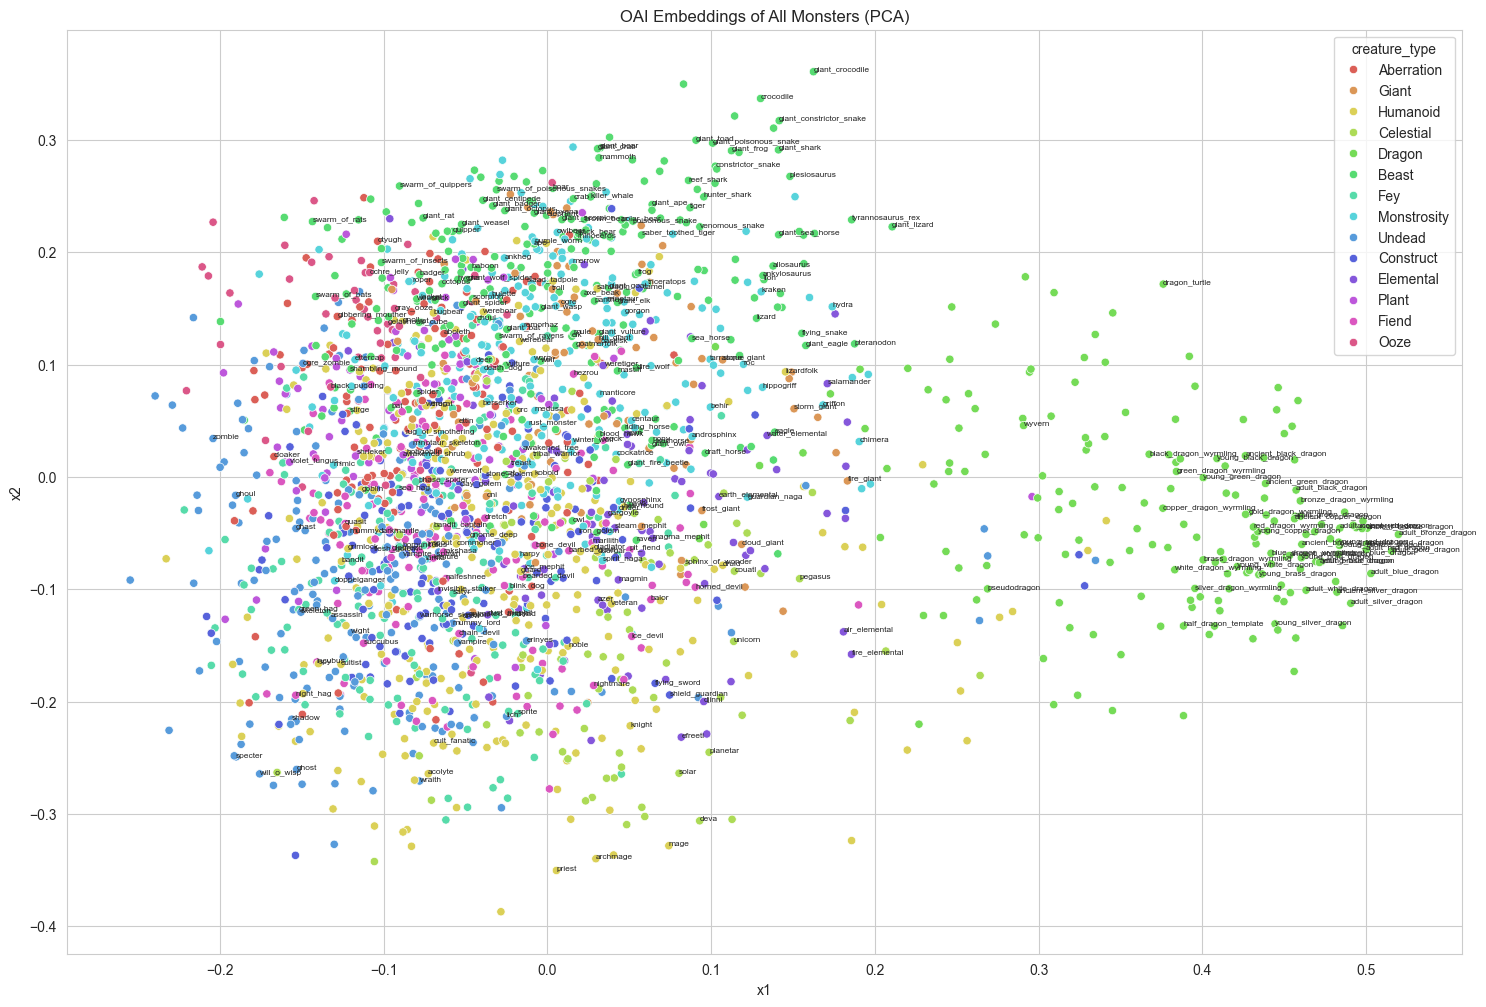

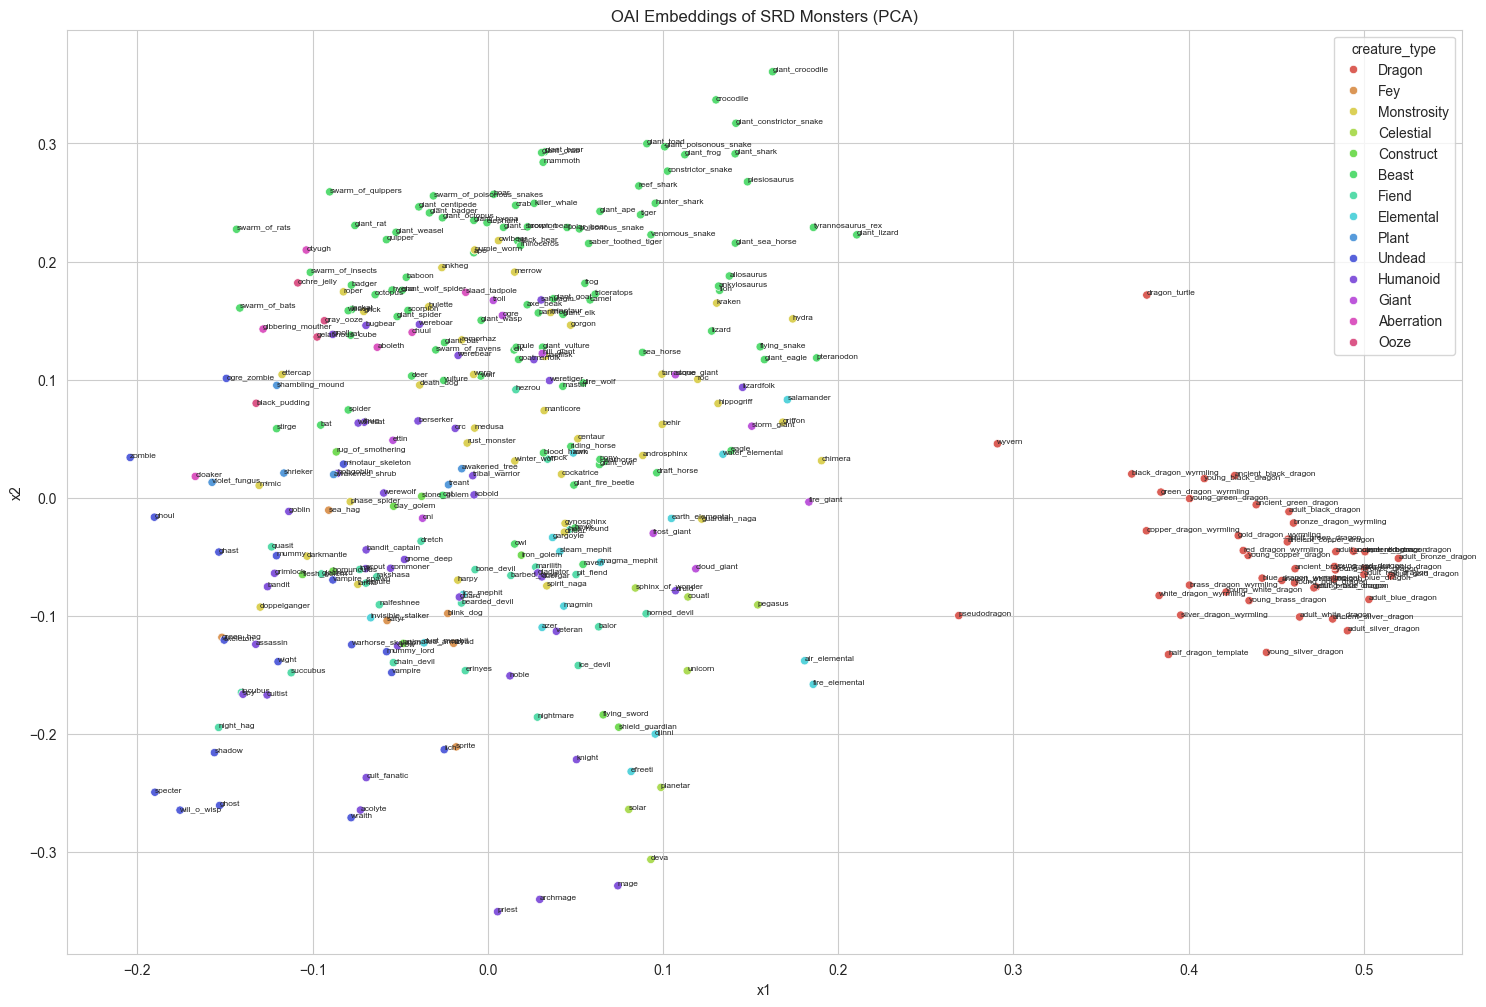

In [4]:
pca = PCA(n_components=2)
X = pca.fit_transform(oai_embeddings.embeddings)
x1, x2 = X[:, 0], X[:, 1]

df = pd.DataFrame([
    pd.Series(x1, name='x1'),
    pd.Series(x2, name='x2'),
    pd.Series(ct, name='creature_type')
]).T

fig, ax = plt.subplots(1,1, figsize=(18,12))
sns.scatterplot(
    data=df,
    x = 'x1',
    y= 'x2',
    hue='creature_type'
)

iconic_srd_monsters = [m.key for _, m in monsters.items() if m.is_srd]

srd_xs, srd_ys, srd_cts = [], [], []
for key in iconic_srd_monsters:
    index = oai_embeddings.key_index(key)
    embedding = oai_embeddings[index]
    pca_x = pca.transform(embedding[np.newaxis, :])
    m_x, m_y = pca_x[0, 0], pca_x[0, 1]
    srd_xs.append(m_x)
    srd_ys.append(m_y)
    srd_cts.append(monsters[key].creature_type)

for i, monster in enumerate(iconic_srd_monsters):
    ax.annotate(monster, (srd_xs[i], srd_ys[i]), size=6)

ax.set_title("OAI Embeddings of All Monsters (PCA)")


for srd_monster in iconic_srd_monsters:
    key = name_to_key(srd_monster)
    index = oai_embeddings.key_index(key)
    embedding = oai_embeddings[index]

    mask = np.ones(oai_embeddings.n, dtype=np.bool)
    mask[index] = False
    others = oai_embeddings.embeddings[mask,:]

    similarities = embedding_similarity(embedding[np.newaxis, :], others)
    similarities = similarities.flatten()

    distances = embedding_distance(embedding[np.newaxis, :], others)
    distances = distances.flatten()

fig, ax = plt.subplots(1,1, figsize=(18,12))
df = pd.DataFrame([
    pd.Series(srd_xs, name='x1'),
    pd.Series(srd_ys, name='x2'),
    pd.Series(srd_cts, name='creature_type')
]).T

sns.scatterplot(
    data=df,
    x='x1',
    y='x2',
    hue='creature_type',
    ax=ax
)

for i, monster in enumerate(iconic_srd_monsters):
    ax.annotate(monster, (srd_xs[i], srd_ys[i]), size=6)

ax.set_title("OAI Embeddings of SRD Monsters (PCA)")



Text(0.5, 1.0, 'Fine-Tuned Embeddings of SRD Monsters (PCA)')

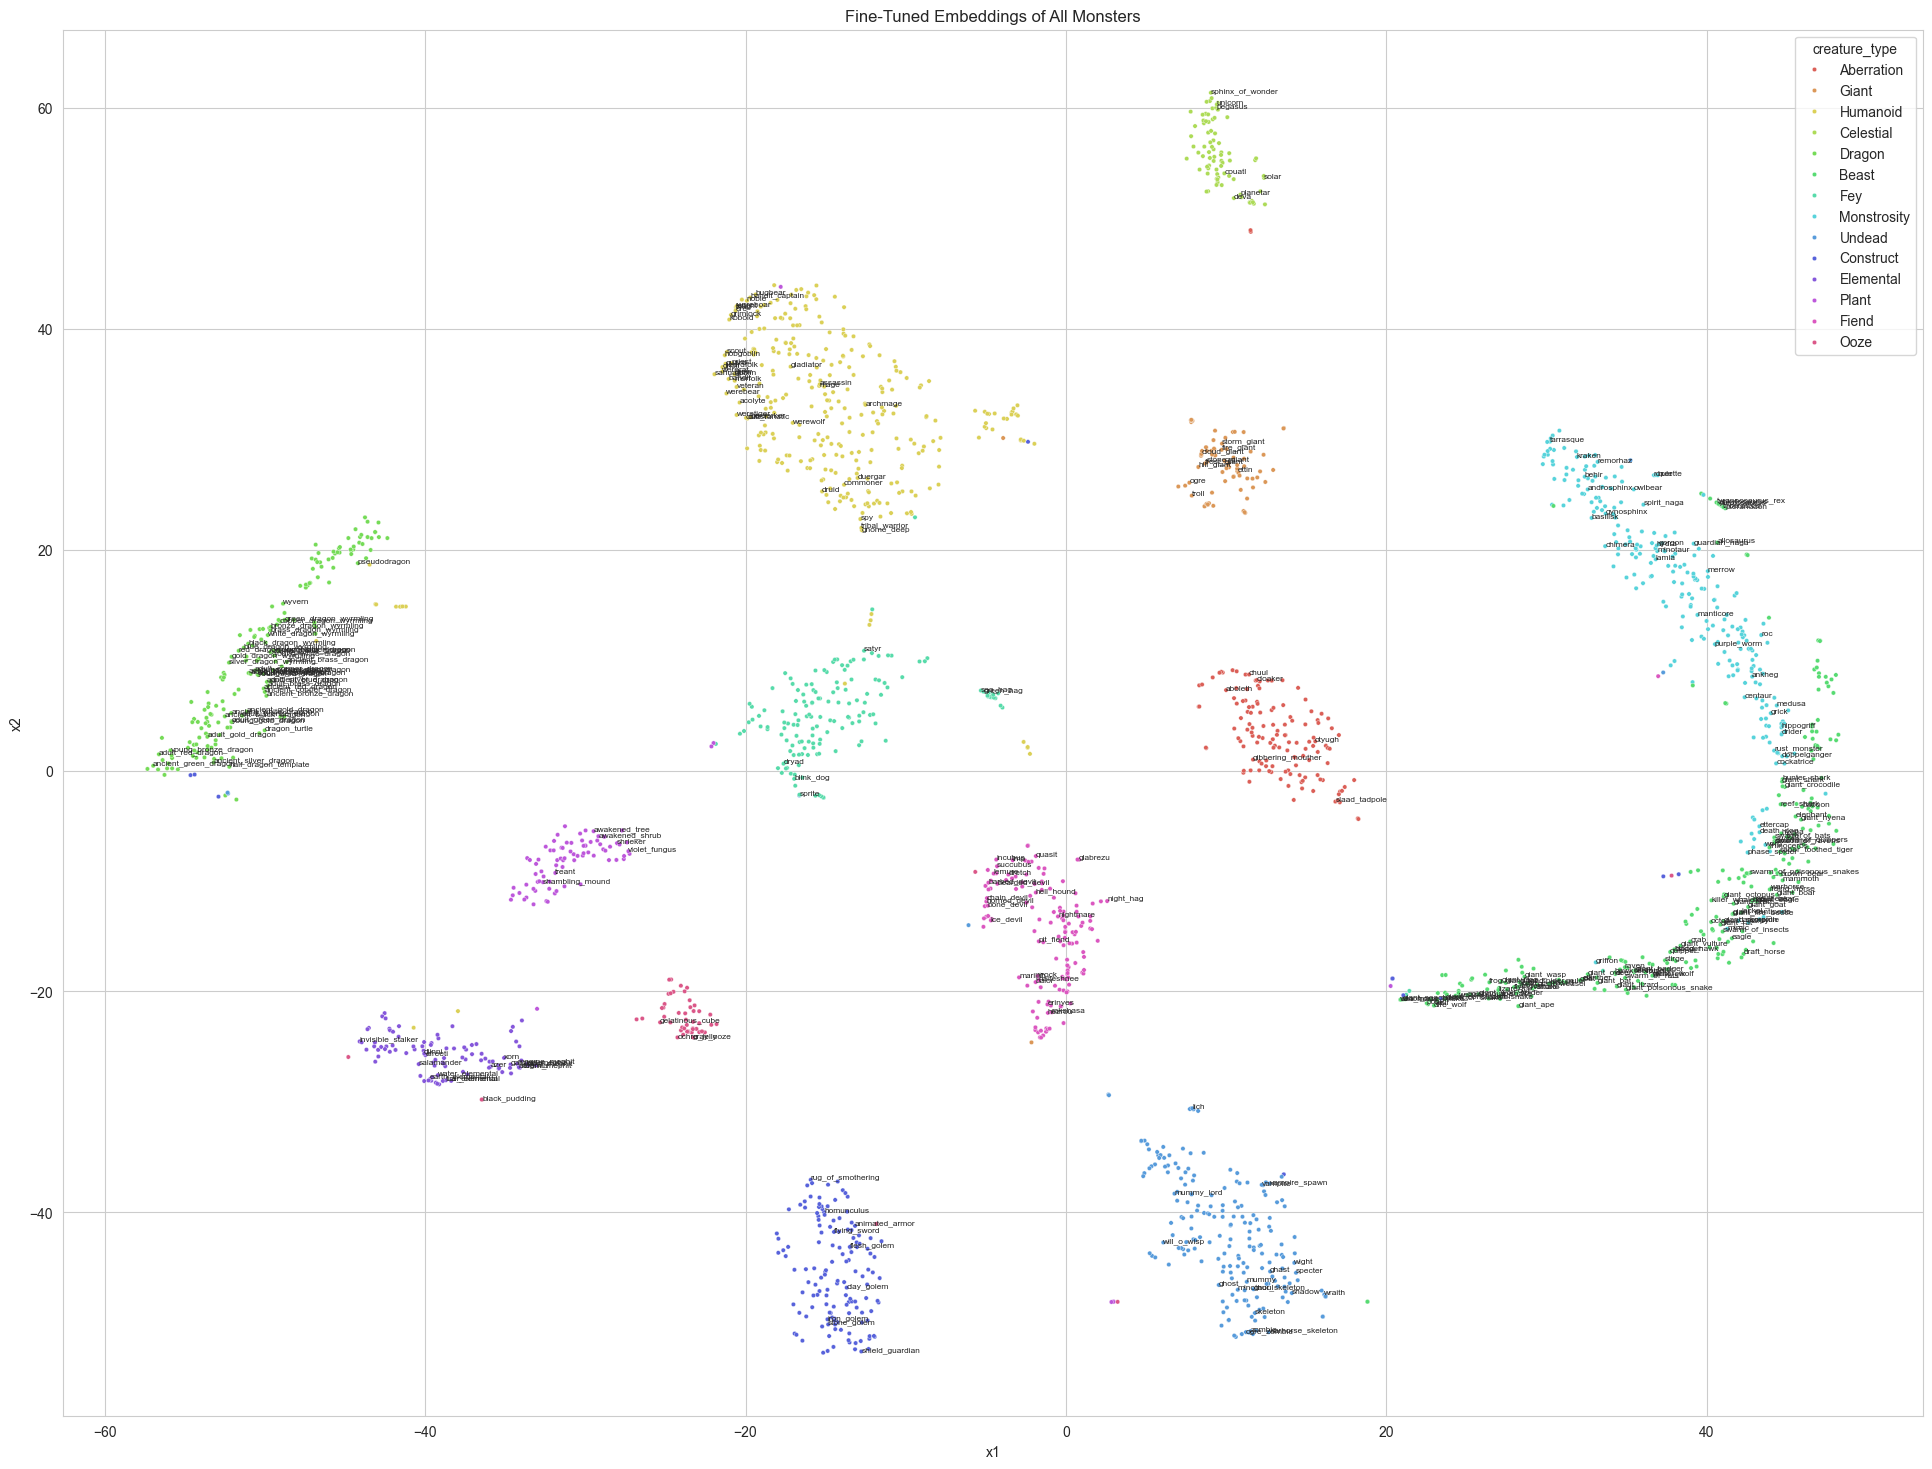

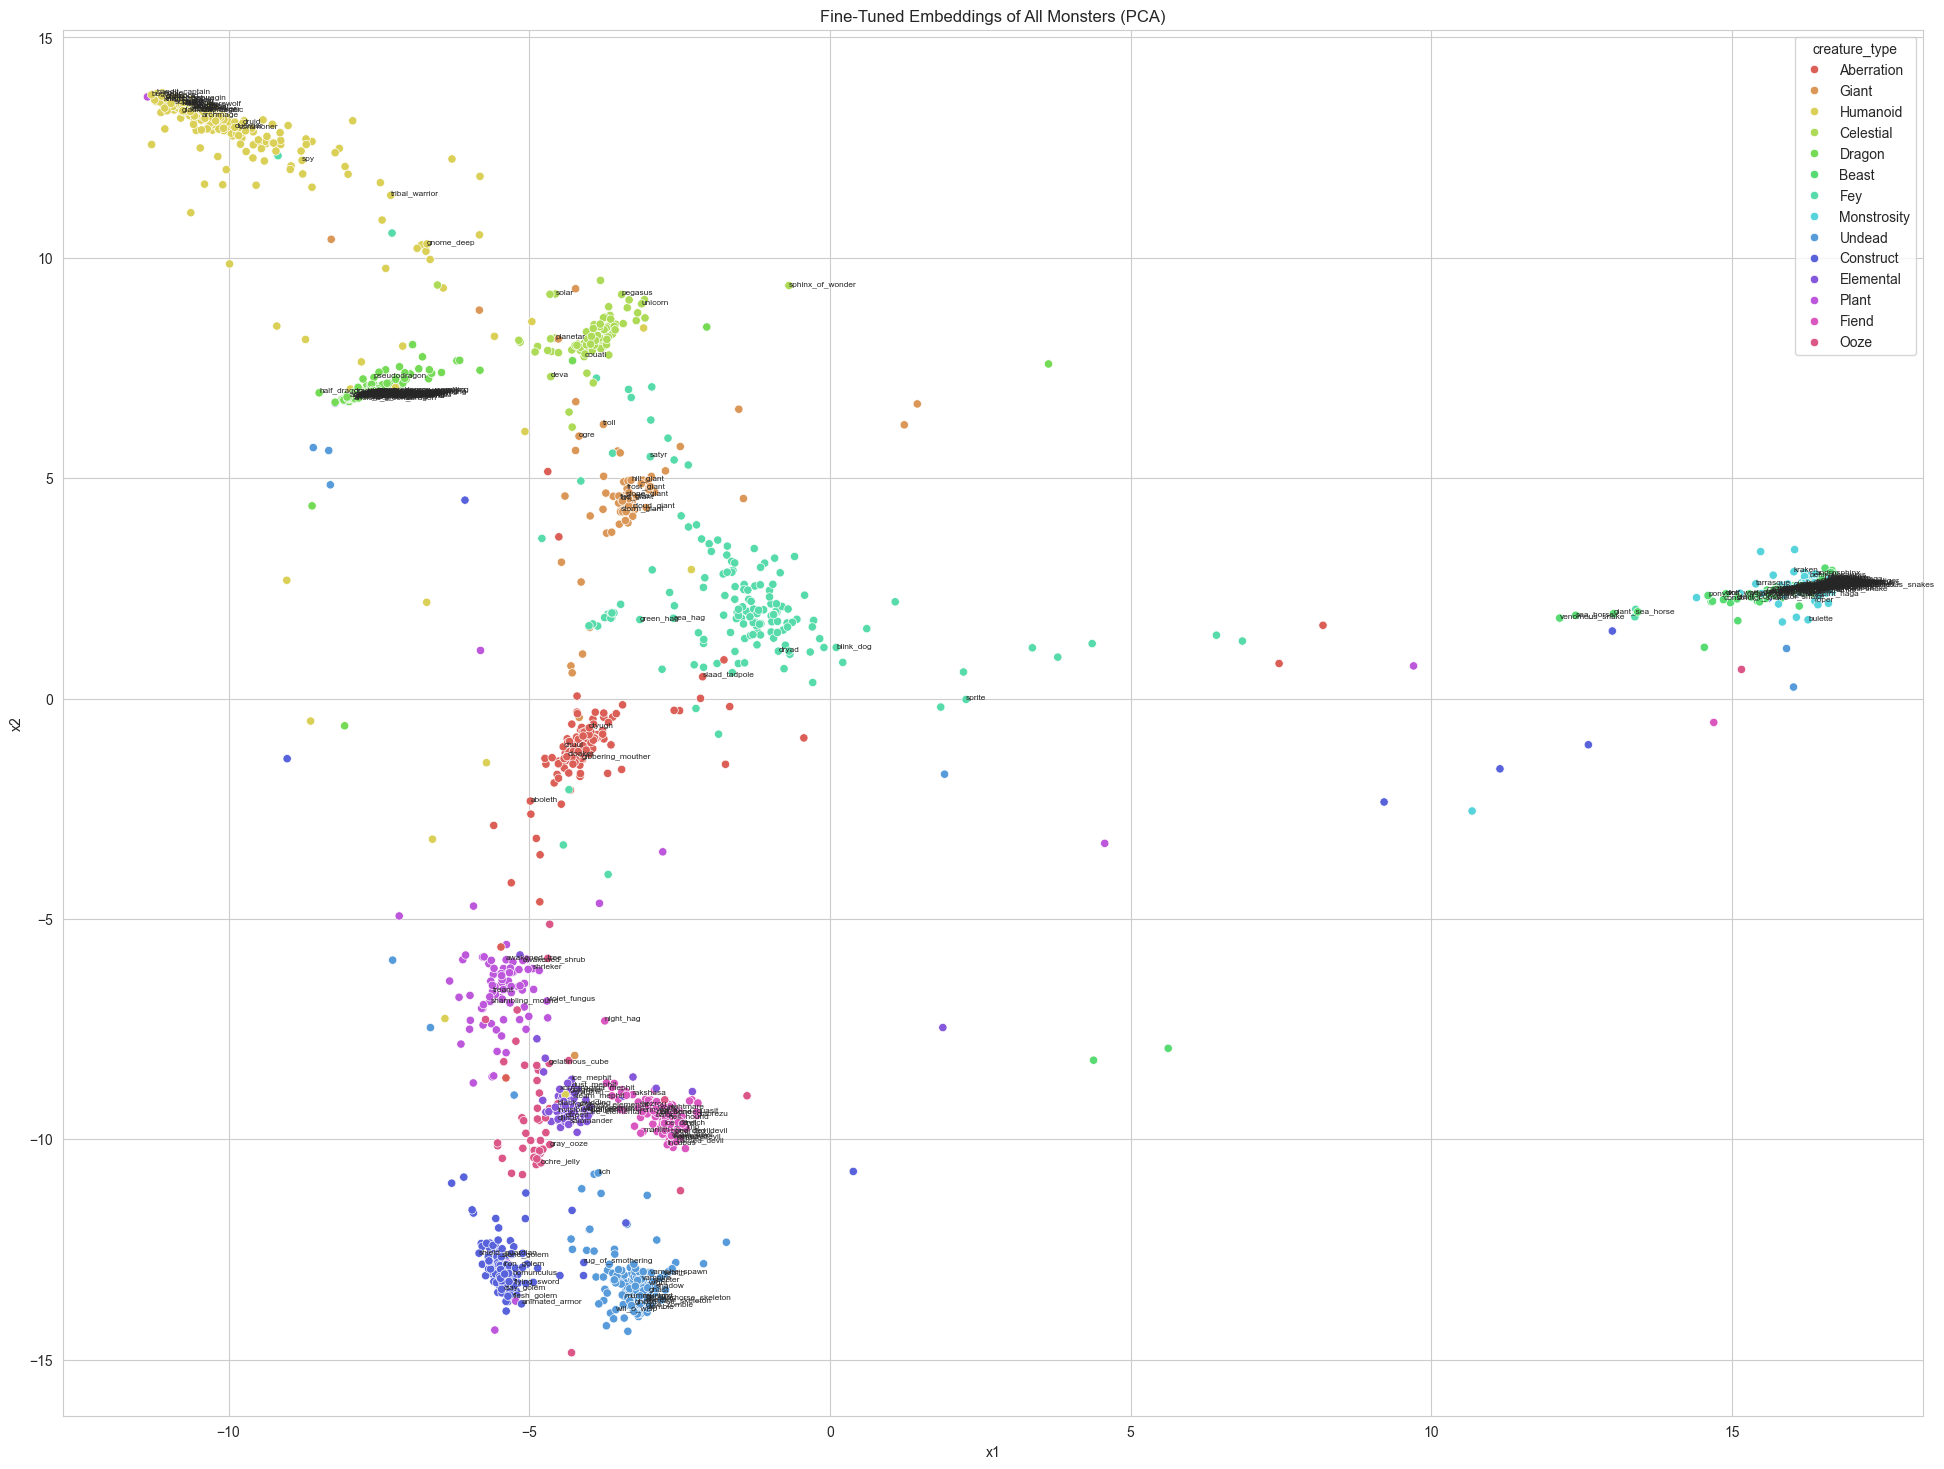

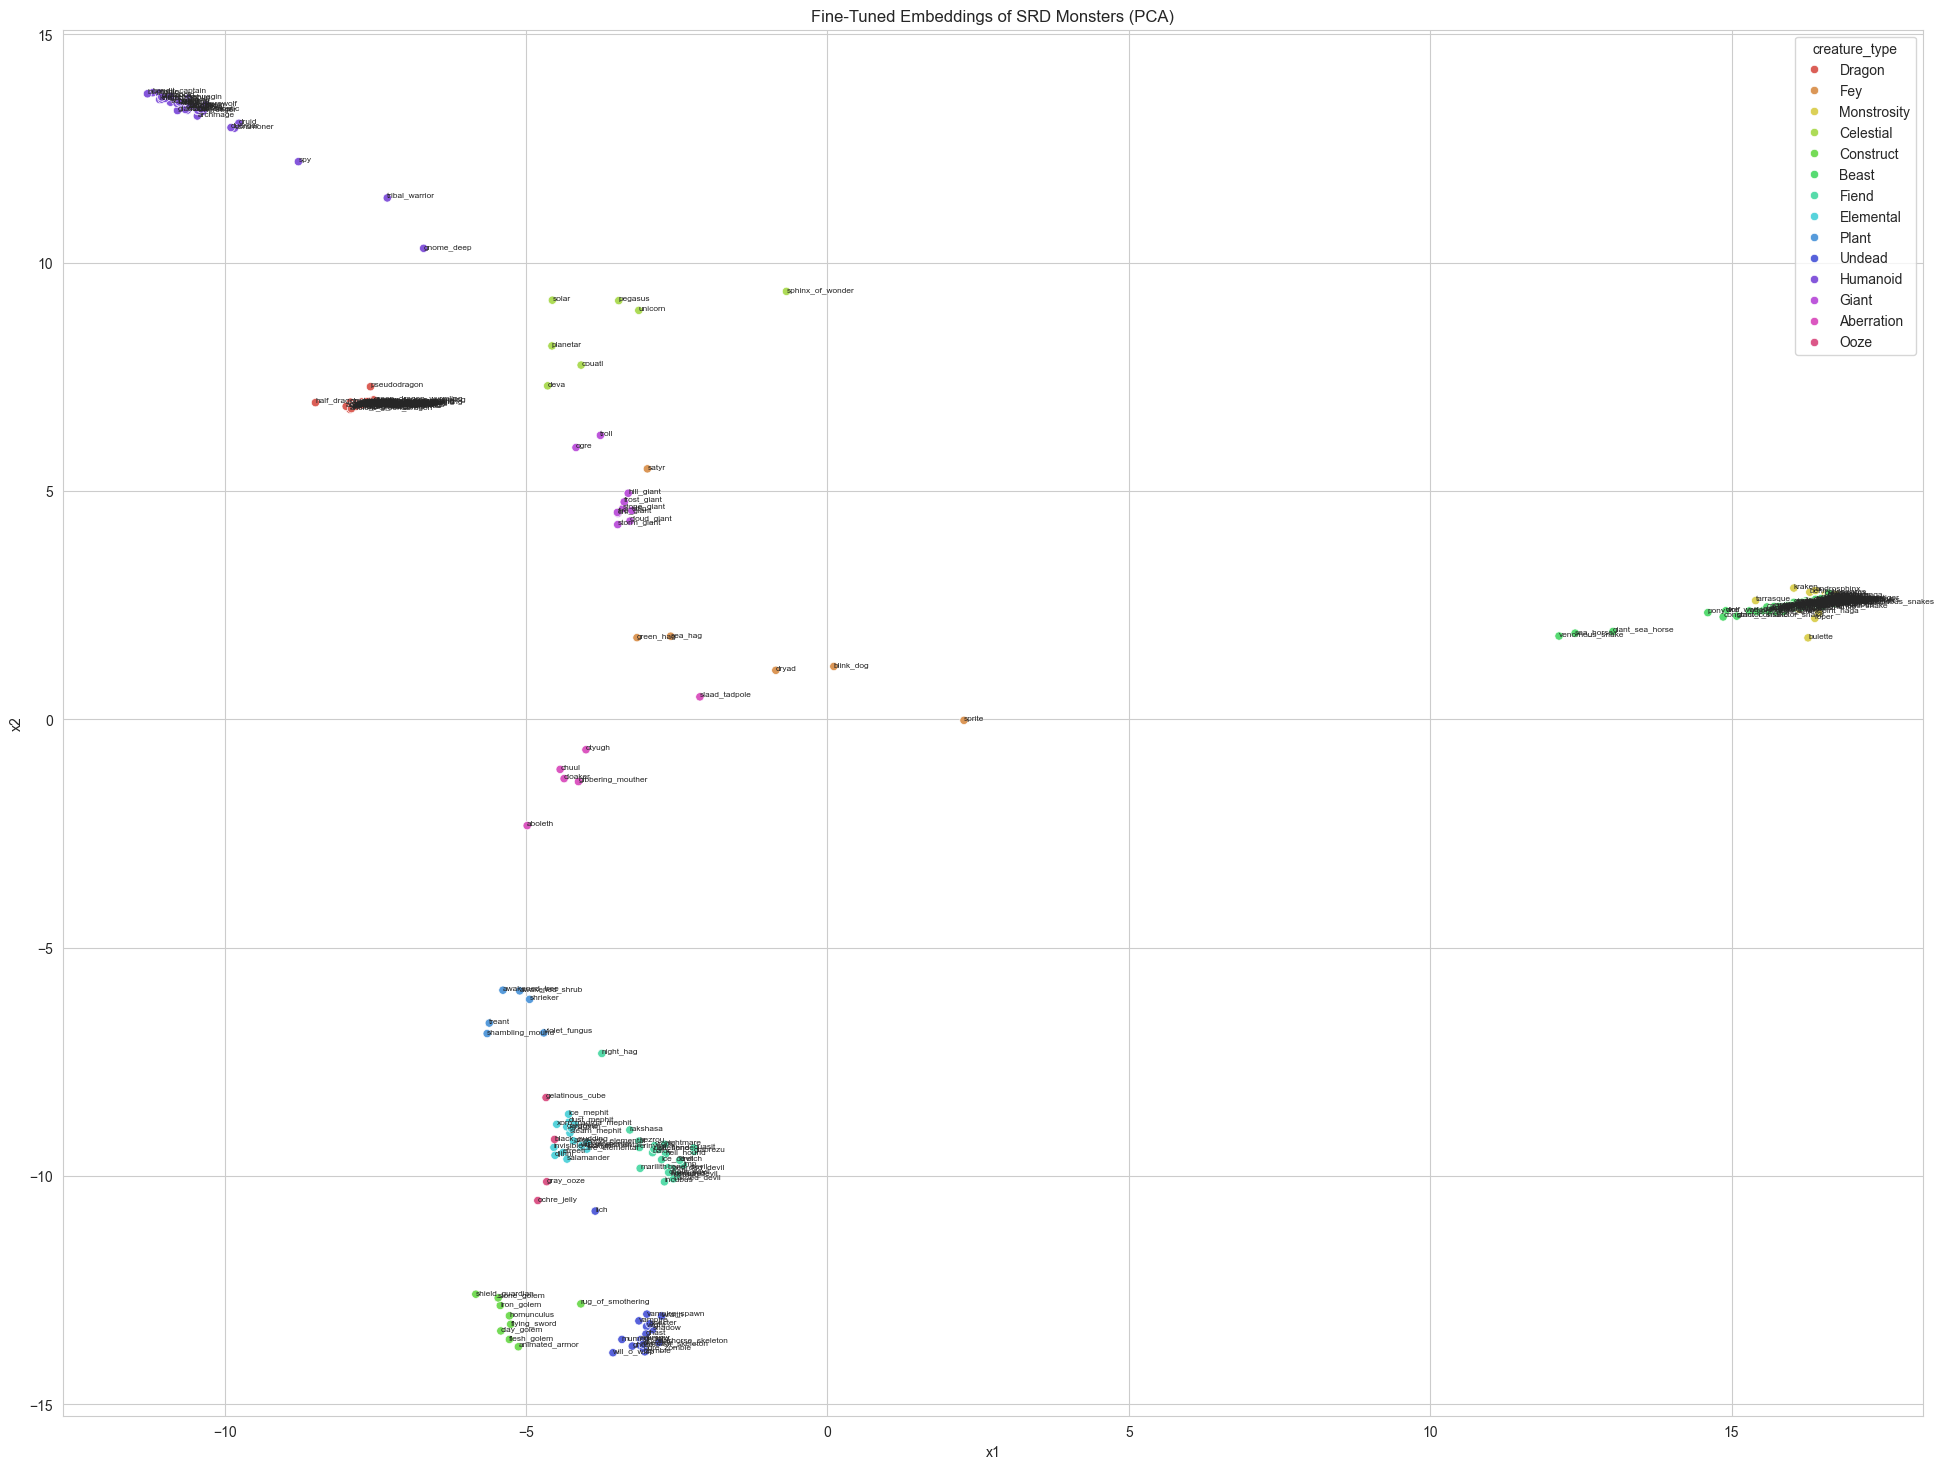

In [7]:
tsne = TSNE(n_components=2, random_state=20240711)
X = tsne.fit_transform(embeddings.embeddings)

x1, x2 = X[:, 0], X[:, 1]
ct = [monsters[k].creature_type for k in oai_embeddings.keys]

df = pd.DataFrame([
    pd.Series(x1, name='x1'),
    pd.Series(x2, name='x2'),
    pd.Series(ct, name='creature_type')
]).T

fig, ax = plt.subplots(1,1, figsize=(24,18))
sns.scatterplot(
    data=df,
    x='x1',
    y='x2',
    hue='creature_type',
    ax=ax,
    s=10
)

for i, key in enumerate(embeddings.keys):
    monster = monsters[key]
    if monster.is_srd:
        ax.annotate(monster.key, (x1[i], x2[i]), size=6)

ax.set_title("Fine-Tuned Embeddings of All Monsters")


pca = PCA(n_components=2)
X = pca.fit_transform(embeddings.embeddings)
x1, x2 = X[:, 0], X[:, 1]

df = pd.DataFrame([
    pd.Series(x1, name='x1'),
    pd.Series(x2, name='x2'),
    pd.Series(ct, name='creature_type')
]).T

fig, ax = plt.subplots(1,1, figsize=(24,18))
sns.scatterplot(
    data=df,
    x = 'x1',
    y= 'x2',
    hue='creature_type'
)

iconic_srd_monsters = [m.key for _, m in monsters.items() if m.is_srd]

srd_xs, srd_ys, srd_cts = [], [], []
for key in iconic_srd_monsters:
    index = embeddings.key_index(key)
    embedding = embeddings[index]
    pca_x = pca.transform(embedding[np.newaxis, :])
    m_x, m_y = pca_x[0, 0], pca_x[0, 1]
    srd_xs.append(m_x)
    srd_ys.append(m_y)
    srd_cts.append(monsters[key].creature_type)

for i, monster in enumerate(iconic_srd_monsters):
    ax.annotate(monster, (srd_xs[i], srd_ys[i]), size=6)

ax.set_title("Fine-Tuned Embeddings of All Monsters (PCA)")


for srd_monster in iconic_srd_monsters:
    key = name_to_key(srd_monster)
    index = embeddings.key_index(key)
    embedding = embeddings[index]

    mask = np.ones(embeddings.n, dtype=np.bool)
    mask[index] = False
    others = embeddings.embeddings[mask,:]

    similarities = embedding_similarity(embedding[np.newaxis, :], others)
    similarities = similarities.flatten()

    distances = embedding_distance(embedding[np.newaxis, :], others)
    distances = distances.flatten()

fig, ax = plt.subplots(1,1, figsize=(24,18))
df = pd.DataFrame([
    pd.Series(srd_xs, name='x1'),
    pd.Series(srd_ys, name='x2'),
    pd.Series(srd_cts, name='creature_type')
]).T

sns.scatterplot(
    data=df,
    x='x1',
    y='x2',
    hue='creature_type',
    ax=ax
)

for i, monster in enumerate(iconic_srd_monsters):
    ax.annotate(monster, (srd_xs[i], srd_ys[i]), size=6)

ax.set_title("Fine-Tuned Embeddings of SRD Monsters (PCA)")



In [21]:
monsters = [
    "Yeti",
    "Giant Spider",
    "Aboleth",
    "Berserker",
    "Archmage",
    "Lich",
    "Assassin",
    "Orc",
    "Ogre",
    "Fire Giant",
    "Goblin",
    "Thug",
    "Assassin",
    "Bandit",
    "Zombie",
    "Skeleton",
    "Pixie",
    "Sprite",
]

for monster in monsters:
    results = find_closest_monsters(monster, limit=5, srd_only=True)
    print(f"Monster: {monster}")
    for result in results:
        print(f"  {result.monster.name}  ({result.distance:.2f})")


queries = [
    "walking corpse",
    "loves snow and is weak to fire",
    "A scary ice monster with sharp teeth",
    "A big spider with a poisonous bite",
    "A mind-shattering foe that can control your thoughts",
    "Battle-hardened warriors with a thirst for blood",
    "A powerful mage",
    "A powerful undead necromancer",
    "Sneaky foe that kills you in the dark",
    "weak undead shambling corpse",
    "powerful undead lord",
    "undead creature that grapples you and is hard to kill",
    "small fey that steals your stuff",
    "tiny whimsical fey creature",
    "undead spirit that can possess you",
    "undead spirit that possesses you"
]

for query in queries:
    results = find_similar_monsters_from_description(query, srd_only=True)
    print(f"Query: {query}")
    for result in results:
        print(f"  {result.monster.name}  ({result.similarity:.2f})")

Monster: Yeti
  Ankheg  (0.65)
  Roc  (0.76)
  Purple Worm  (0.79)
  Manticore  (0.89)
  Medusa  (0.99)
  Grick  (1.02)
Monster: Giant Spider
  Spider  (0.50)
  Rat  (0.62)
  Bat  (0.63)
  Giant Wasp  (0.68)
  Giant Weasel  (0.72)
Monster: Aboleth
  Cloaker  (2.34)
  Chuul  (2.50)
  Gibbering Mouther  (2.93)
  Otyugh  (3.22)
  Slaad Tadpole  (8.88)
Monster: Berserker
  Cultist  (0.55)
  Cult Fanatic  (0.55)
  Veteran  (0.73)
  Acolyte  (0.82)
  Weretiger (Lycanthrope)  (0.87)
Monster: Archmage
  Mage  (1.11)
  Assassin  (1.26)
  Berserker  (1.63)
  Gladiator  (1.71)
  Werebear (Lycanthrope)  (1.73)
Monster: Lich
  Marilith (Demon)  (4.41)
  Erinyes (Devil)  (4.65)
  Rakshasa  (4.86)
  Ice Devil  (4.86)
  Nalfeshnee (Demon)  (4.90)
Monster: Assassin
  Mage  (0.77)
  Veteran  (0.90)
  Merfolk  (0.92)
  Berserker  (0.95)
  Gladiator  (1.00)
Monster: Orc
  Thug  (0.53)
  Knight  (0.58)
  Kobold  (0.61)
  Grimlock  (0.62)
  Wereboar (Lycanthrope)  (0.69)
Monster: Ogre
  Hill Giant  (2.97)
 